<a href="https://colab.research.google.com/github/isabelapt/Bootcamp_Data_Science_Alura/blob/main/Modulo_1/Modulo1Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISANDO DADOS DA SAÚDE COM PYTHON E PANDAS**

# Aula 4: Alternativas de visualizações

Importando todas as bibliotecas necessárias

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [308]:
URL = "https://raw.githubusercontent.com/isabelapt/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"
dados = pd.read_csv(URL, encoding="ISO-8859-1", skiprows = 3, skipfooter=12, sep=";",                     
                    thousands=".", decimal=",", engine='python')

# A média retorna somente os valores para as colunas que tem todas as linhas preenchidas
# Index é imutável
# Para inserir mais uma coluna em colunas preenchidas tem que transformar para lista : .tolist()
colunas_preenchidas = dados.mean().index.tolist()

# Inserir, na posição 0, ou seja, no começo do dataset (para facilitar),
# o valor “Unidade da Federação”.
colunas_preenchidas.insert(0,"Unidade da Federação")

# Fazer slice no dataFrame usando só as colunas_preenchidas
dados_usaveis = dados[colunas_preenchidas]

# Mudar o index para ser a coluna "Unidade da Federação"
# O set_index retorna um valor novo que tem que ser reatribuido
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")

# Ordenado pelo valor total de gastos de todos os períodos de tempo
ordenado_por_total = dados_usaveis.sort_values("Total", ascending=False) 
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.060277e+08,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43 Rio Grande do Sul,10492

In [309]:
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_mes_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_mes_mais_recente.head()

Unidade da Federação
35 São Paulo            2.827096e+08
31 Minas Gerais         1.204672e+08
41 Paraná               8.032085e+07
43 Rio Grande do Sul    7.892970e+07
33 Rio de Janeiro       7.154023e+07
Name: 2020/Jul, dtype: float64

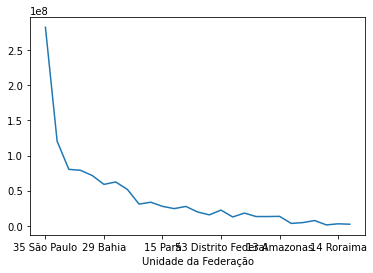

In [310]:
gastos_mes_mais_recente.plot()

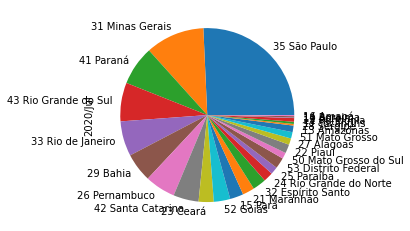

In [311]:
gastos_mes_mais_recente.plot(kind='pie')

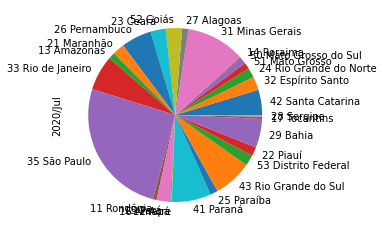

In [312]:
gastos_mes_mais_recente.sample(frac=1).plot(kind='pie') # not ordered

**Comments:**
* To plot just one serie, line plot is a poor plot.
* Pie plot is not a good option
  * With a great number of labels, legends a too tight and the colors can be repeated
  * It is not good to see the difference, unless the graph is ordernated

In [313]:
# Data related to Rio de Janeiro
gastos_mes_mais_recente/gastos_mes_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo              3.951757
31 Minas Gerais           1.683908
41 Paraná                 1.122737
43 Rio Grande do Sul      1.103291
33 Rio de Janeiro         1.000000
29 Bahia                  0.823286
26 Pernambuco             0.871194
42 Santa Catarina         0.723572
23 Ceará                  0.430656
52 Goiás                  0.468258
15 Pará                   0.386059
21 Maranhão               0.340706
32 Espírito Santo         0.383847
24 Rio Grande do Norte    0.273875
25 Paraíba                0.216542
53 Distrito Federal       0.310784
50 Mato Grosso do Sul     0.174849
22 Piauí                  0.251875
27 Alagoas                0.182944
51 Mato Grosso            0.182878
13 Amazonas               0.186727
28 Sergipe                0.046306
17 Tocantins              0.062757
11 Rondônia               0.103542
12 Acre                   0.016268
14 Roraima                0.038293
16 Amapá                  0.030124
Name: 2020/Jul, dtype: float64

# DESAFIO 1

Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

In [314]:
gastos_mes_mais_recente

Unidade da Federação
35 São Paulo              2.827096e+08
31 Minas Gerais           1.204672e+08
41 Paraná                 8.032085e+07
43 Rio Grande do Sul      7.892970e+07
33 Rio de Janeiro         7.154023e+07
29 Bahia                  5.889810e+07
26 Pernambuco             6.232544e+07
42 Santa Catarina         5.176453e+07
23 Ceará                  3.080922e+07
52 Goiás                  3.349928e+07
15 Pará                   2.761873e+07
21 Maranhão               2.437421e+07
32 Espírito Santo         2.746048e+07
24 Rio Grande do Norte    1.959306e+07
25 Paraíba                1.549147e+07
53 Distrito Federal       2.223354e+07
50 Mato Grosso do Sul     1.250872e+07
22 Piauí                  1.801921e+07
27 Alagoas                1.308785e+07
51 Mato Grosso            1.308315e+07
13 Amazonas               1.335851e+07
28 Sergipe                3.312766e+06
17 Tocantins              4.489666e+06
11 Rondônia               7.407388e+06
12 Acre                   1.163813e+06
14 R

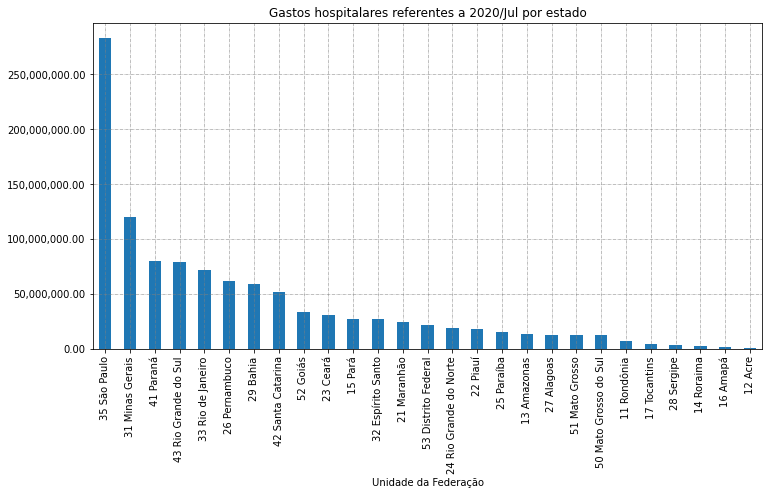

In [315]:
ax = gastos_mes_mais_recente.sort_values(ascending = False).plot(kind='bar',
                                                            figsize = (12,6)) 
# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Gastos hospitalares referentes a 2020/Jul por estado")
plt.show()

# DESAFIO 2

Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

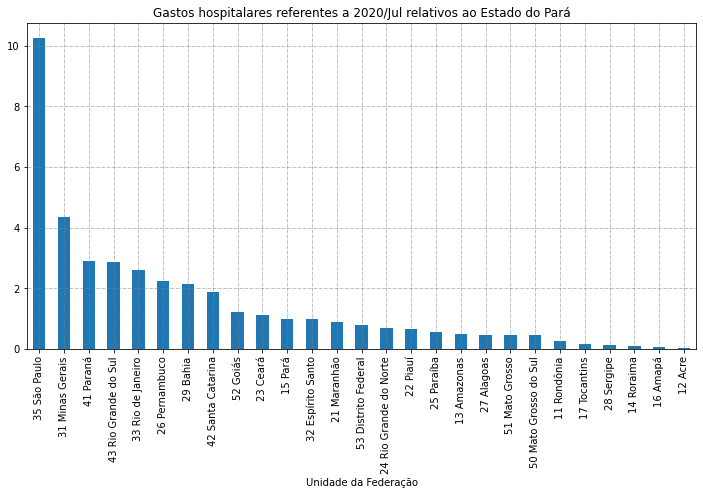

In [316]:
# Data related to Pará
gastos_related_2para = gastos_mes_mais_recente/gastos_mes_mais_recente.loc["15 Pará"]

gastos_related_2para.sort_values(ascending = False).plot(kind='bar',
                                                            figsize = (12,6),
                                                            grid = True) 
# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

plt.title("Gastos hospitalares referentes a 2020/Jul relativos ao Estado do Pará")
plt.show()

# DESAFIO 3

Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Selected 2 States (São Paulo and Pará), check the total hospital expenses during 2019 and make the proportion to the estimated resident population in that year

In [317]:
URL = "https://raw.githubusercontent.com/isabelapt/Bootcamp_Data_Science_Alura/main/data/tabela6579.csv"
populacao = pd.read_csv(URL, skiprows = 3, skipfooter=92, sep=";",                     
                    thousands=".", decimal=",", engine='python')
populacao = populacao.set_index('Brasil, Grande Região e Unidade da Federação')
populacao.head(10)

,2018,2019,2020
"Brasil, Grande Região e Unidade da Federação",,,
Brasil,208494900,210147125,211755692
Norte,18182253,18430980,18672591
Nordeste,56760780,57071654,57374243
Sudeste,87711946,88371433,89012240
Sul,29754036,29975984,30192315
Centro-Oeste,16085885,16297074,16504303
Rondônia,1757589,1777225,1796460
Acre,869265,881935,894470
Amazonas,4080611,4144597,4207714


In [318]:
# Find total hospital expenses in 2019
gastos_meses_2019 = ordenado_por_total.loc[:,"2019/Jan":"2019/Dez"]
gastos_total_2019 = gastos_meses_2019.sum(axis=1)

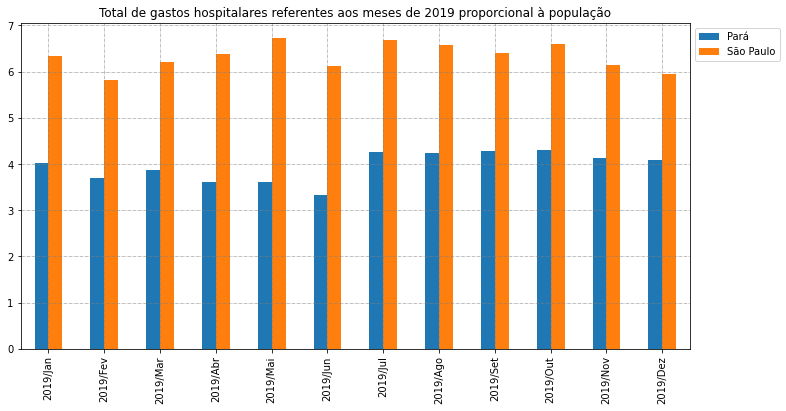

In [319]:
gastos_pa_pessoa = gastos_meses_2019.loc["15 Pará"]/populacao.loc["Pará"]["2019"]
gastos_sp_pessoa = gastos_meses_2019.loc["35 São Paulo"]/populacao.loc["São Paulo"]["2019"]

plotdata = pd.DataFrame({
    "Pará": gastos_pa_pessoa,
    "São Paulo": gastos_sp_pessoa}, 
    index= gastos_pa_pessoa.index)

ax = plotdata.plot(kind="bar", figsize = (12,6))

# Create a outter box to put the legend
ax.legend(bbox_to_anchor = (1,1), loc = "upper left")

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

plt.title("Total de gastos hospitalares referentes aos meses de 2019 proporcional à população")
plt.show()

The average expenses of Para to each person is 4 reais along 2019's months. The average expenses of SP to each person is between 6.25 reais along 2019's months. 

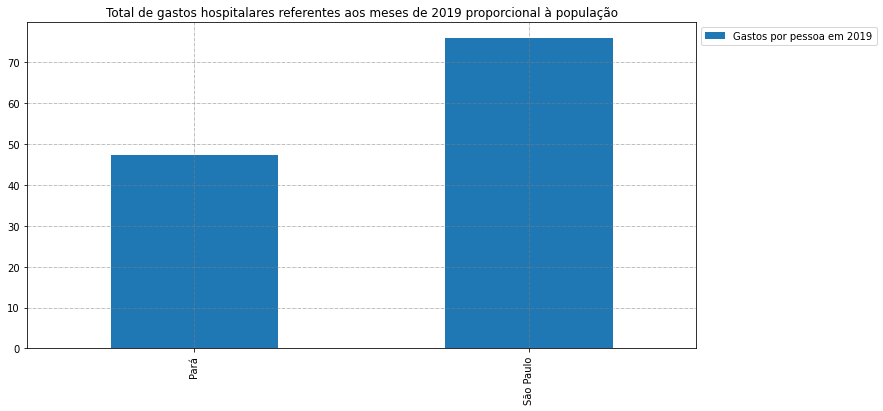

In [320]:
gastos_pa_pessoa2 = gastos_total_2019.loc["15 Pará"]/populacao.loc["Pará"]["2019"]
gastos_sp_pessoa2 = gastos_total_2019.loc["35 São Paulo"]/populacao.loc["São Paulo"]["2019"]

plotdata = pd.DataFrame({"Gastos por pessoa em 2019":[gastos_pa_pessoa2,gastos_sp_pessoa2],
                        "UF":["Pará","São Paulo"]},
                        index =["Pará","São Paulo"])

ax = plotdata.plot(kind="bar", figsize = (12,6))

# Create a outter box to put the legend
ax.legend(bbox_to_anchor = (1,1), loc = "upper left")

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

plt.title("Total de gastos hospitalares referentes aos meses de 2019 proporcional à população")
plt.show()

# DESAFIO 4

Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

In [321]:
dict_regiões = {'1' : 'Norte',
                '2' : 'Nordeste',
                '3' : 'Sudeste',
                '4' : 'Sul',
                '5' : 'Centro-Oeste'}
regiao = [dict_regiões[id[0]] for id in ordenado_por_total.index]

# Insert the data as the last column
ordenado_por_total["Região"] = regiao

# Move Região Column to the be the first one
col = ordenado_por_total.pop("Região")
ordenado_por_total.insert(0,col.name, col)

ordenado_por_total.head()

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,Sul,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,...,1.060277e+08,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43 Rio Grande do Sul,Sul,1049252.33,3182913.14,

In [322]:
# Grouping and Summing the total expenses by region
grouped_regiao = ordenado_por_total.groupby('Região').sum()

# Summing expenses just for 2019 months
grouped_regiao_2019 = grouped_regiao.loc[:,"2019/Jan":"2019/Dez"].sum(axis=1)
grouped_regiao_2019

Região
Centro-Oeste    1.080392e+09
Nordeste        3.713300e+09
Norte           8.858225e+08
Sudeste         6.641653e+09
Sul             3.398440e+09
dtype: float64

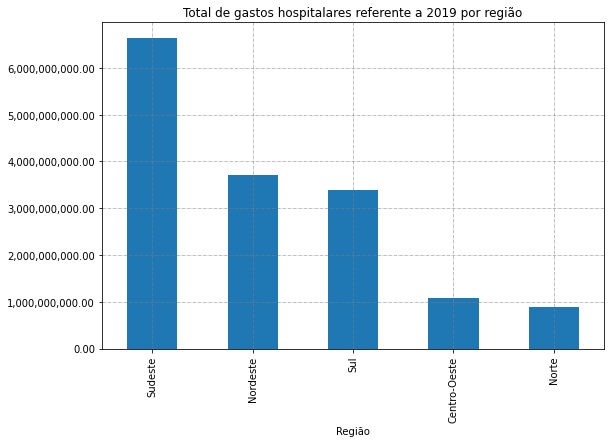

In [323]:
grouped_regiao_sorted = grouped_regiao_2019.sort_values(ascending=False) 

ax = grouped_regiao_sorted.plot(figsize=(9,6), kind ='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Total de gastos hospitalares referente a 2019 por região")
plt.show()

# DESAFIO 5

Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

In [324]:
# Summing the total expenses during 2018 and 2019 by each region
grouped_regiao["Total 2018"] = grouped_regiao.loc[:,"2018/Jan":"2018/Dez"].sum(axis=1)
grouped_regiao["Total 2019"] = grouped_regiao.loc[:,"2019/Jan":"2019/Dez"].sum(axis=1)
grouped_regiao_18_19 = grouped_regiao[grouped_regiao.columns[-2:]]
grouped_regiao_18_19

,Total 2018,Total 2019
Região,,
Centro-Oeste,1.033534e+09,1.080392e+09
Nordeste,3.554741e+09,3.713300e+09
Norte,8.555853e+08,8.858225e+08
Sudeste,6.373696e+09,6.641653e+09
Sul,3.259713e+09,3.398440e+09


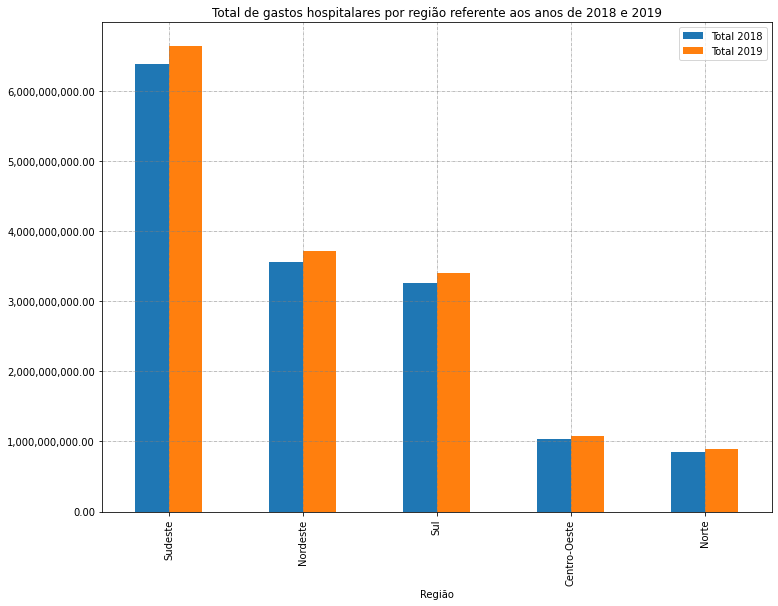

In [325]:
grouped_regiao_18_19_sort = grouped_regiao_18_19.sort_values("Total 2019", ascending = False)

ax = grouped_regiao_18_19_sort.plot(figsize=(12,9),kind='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Total de gastos hospitalares por região referente aos anos de 2018 e 2019")
plt.show()

In [326]:
# Estimated resident population in 2018 and 2019 
population_copy = populacao.copy()
population_copy = population_copy.iloc[1:6,0:2]
population_copy

,2018,2019
"Brasil, Grande Região e Unidade da Federação",,
Norte,18182253,18430980
Nordeste,56760780,57071654
Sudeste,87711946,88371433
Sul,29754036,29975984
Centro-Oeste,16085885,16297074


Join population DataFrame to the Hospital expenses Dataframe

In [327]:
# Index of the dataframes to join
print(grouped_regiao_18_19.index)
print(population_copy.index)

Index(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'], dtype='object', name='Região')
Index(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'], dtype='object', name='Brasil, Grande Região e Unidade da Federação')


In [328]:
total_18_19_regiao = pd.concat([grouped_regiao_18_19,population_copy], axis=1)
total_18_19_regiao["Total 2018/person"] = total_18_19_regiao.loc[:,"Total 2018"]/total_18_19_regiao.loc[:,"2018"]
total_18_19_regiao["Total 2019/person"] = total_18_19_regiao.loc[:,"Total 2019"]/total_18_19_regiao.loc[:,"2019"]
total_18_19_regiao

,Total 2018,Total 2019,2018,2019,Total 2018/person,Total 2019/person
Centro-Oeste,1.033534e+09,1.080392e+09,16085885,16297074,64.251008,66.293589
Nordeste,3.554741e+09,3.713300e+09,56760780,57071654,62.626715,65.063818
Norte,8.555853e+08,8.858225e+08,18182253,18430980,47.056065,48.061607
Sudeste,6.373696e+09,6.641653e+09,87711946,88371433,72.666223,75.156103
Sul,3.259713e+09,3.398440e+09,29754036,29975984,109.555319,113.372075


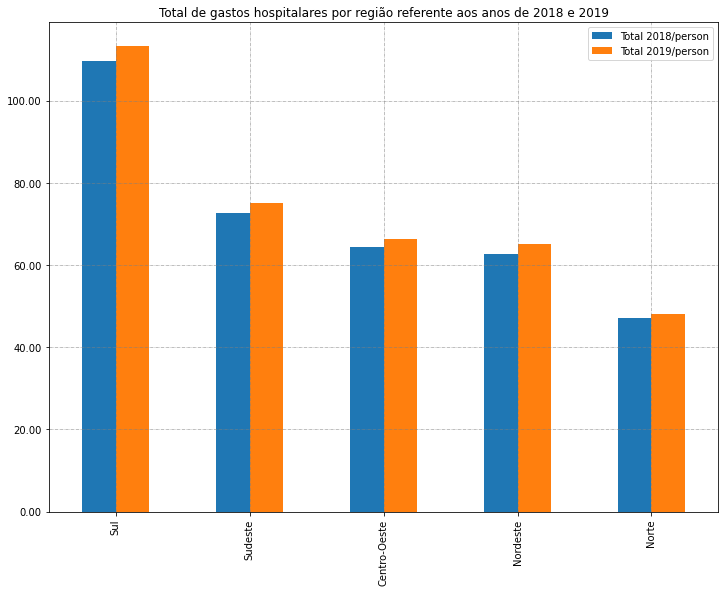

In [329]:
total_18_19_regiao_sort = total_18_19_regiao.sort_values("Total 2019/person", ascending = False)

ax = total_18_19_regiao_sort.iloc[:,-2:].plot(figsize=(12,9),kind='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Total de gastos hospitalares por região referente aos anos de 2018 e 2019")
plt.show()

Although hospital expenses in the southeast and northeast regions are higher in absolute terms, the southern region has higher hospital expenses in proportion to its population.

# SUPER DESAFIO

Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.